<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w5_d3_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Challenge: Classifying Handwritten Digits with CNNs

🛠️ What you will create
You will create two models:

A Fully Connected Neural Network (Dense layers) to classify handwritten digits from the MNIST dataset.
A Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset, and compare its performance with the first model.


What You Need to Do
Load the MNIST dataset:

* Use keras.datasets.mnist.load_data() to load the training and testing data.
* Print the shapes of the loaded data to understand the dataset structure.

Preprocess the data for a Fully Connected Neural Network:

* Flatten the images from 28x28 to 784 pixels.
* Normalize the pixel values by dividing by 255.
* One-hot encode the target labels using keras.utils.np_utils.to_categorical().

Build and train a Fully Connected Neural Network:

* Create a Sequential model.
* Add Dense layers with appropriate activation functions (e.g., ReLU and softmax).
* Compile the model with an optimizer (e.g., Adam), loss function (e.g., categorical cross-entropy), and metrics (e.g., accuracy).
* Train the model using model.fit() and evaluate its performance.

Preprocess the data for a Convolutional Neural Network:

* Reshape the input data to the shape expected by a Conv2D layer (e.g., (60000, 28, 28, 1)).
* Normalize the pixel values by dividing by 255.
* One-hot encode the target labels using keras.utils.np_utils.to_categorical().

Build and train a Convolutional Neural Network:

* Create a Sequential model.
* Add Conv2D and MaxPool2D layers.
* Add a Flatten layer.
* Add Dense layers with appropriate activation functions.
* Compile and train the model, similar to the Fully Connected Neural Network.

Compare the performance:

* Analyze the accuracy of both models.
* Observe the difference between the Fully connected model and the CNN model.


In [1]:
# Setup and import
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# for more reproductible results
tf.random.set_seed(42)
np.random.seed(42)

print(tf.__version__)


2.19.0


In [2]:
# LOAD & INSPECT
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test:", x_test.shape, "y_test:", y_test.shape)

# see some raw values
print("pixel range:", x_train.min(), "->", x_train.max())


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train: (60000, 28, 28) y_train: (60000,)
x_test: (10000, 28, 28) y_test: (10000,)
pixel range: 0 -> 255


In [3]:
# 2. PREPROCESS (DENSE)
num_classes = 10

# Flatten 28x28 -> 784 and normalising in [0,1]
x_train_dense = x_train.reshape((x_train.shape[0], 28*28)).astype("float32") / 255.0
x_test_dense  = x_test.reshape((x_test.shape[0], 28*28)).astype("float32") / 255.0

# One-hot to classes
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat  = keras.utils.to_categorical(y_test,  num_classes)

x_train_dense.shape, y_train_cat.shape


((60000, 784), (60000, 10))

In [4]:
# DENSE MODEL
dense_model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation="softmax")
])

dense_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

dense_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# TRAIN & EVALUATE (Dense)
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history_dense = dense_model.fit(
    x_train_dense, y_train_cat,
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

dense_test_loss, dense_test_acc = dense_model.evaluate(x_test_dense, y_test_cat, verbose=0)
print(f"Dense Test Acc: {dense_test_acc:.4f}")


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8094 - loss: 0.6285 - val_accuracy: 0.9670 - val_loss: 0.1140
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9504 - loss: 0.1637 - val_accuracy: 0.9752 - val_loss: 0.0829
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9654 - loss: 0.1148 - val_accuracy: 0.9737 - val_loss: 0.0826
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9724 - loss: 0.0894 - val_accuracy: 0.9773 - val_loss: 0.0749
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9768 - loss: 0.0734 - val_accuracy: 0.9780 - val_loss: 0.0707
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9808 - loss: 0.0604 - val_accuracy: 0.9797 - val_loss: 0.0666
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9835 - loss: 0.0498 - val_accuracy: 0.9822 - val_loss: 0.0635
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9861 - loss: 0.0431 - val_accuracy:

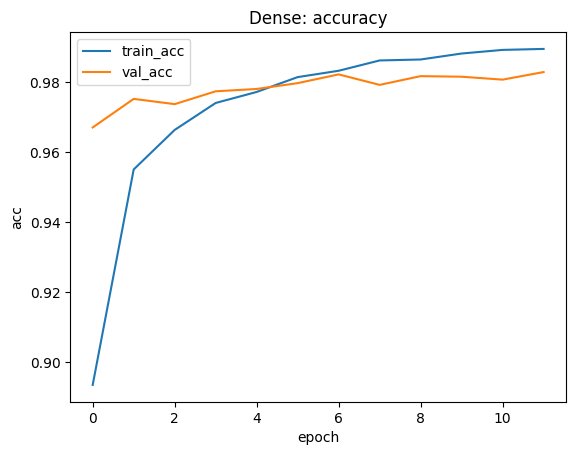

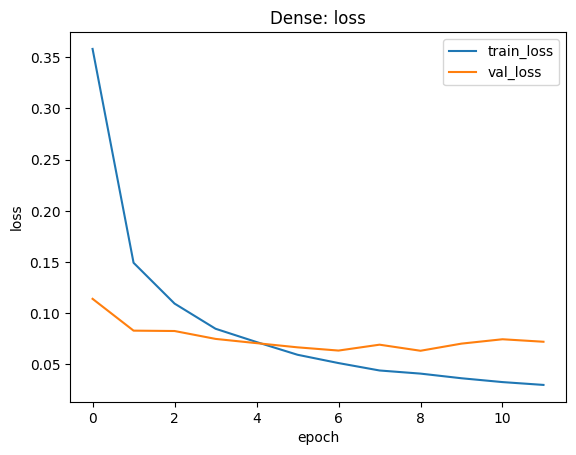

In [6]:
# Training curves (optional but useful)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_dense.history["accuracy"], label="train_acc")
plt.plot(history_dense.history["val_accuracy"], label="val_acc")
plt.title("Dense: accuracy")
plt.xlabel("epoch"); plt.ylabel("acc"); plt.legend(); plt.show()

plt.figure()
plt.plot(history_dense.history["loss"], label="train_loss")
plt.plot(history_dense.history["val_loss"], label="val_loss")
plt.title("Dense: loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.show()


In [7]:
# 4. PREPROCESS (CNN)
# CNN expects (N, 28, 28, 1) – the color channel on the last dimension
x_train_cnn = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test_cnn  = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

# We use the same y one-hot
x_train_cnn.shape, y_train_cat.shape


((60000, 28, 28, 1), (60000, 10))

In [8]:
# 5. CNN MODEL
cnn_model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 5b. TRAIN & EVALUATE (CNN)
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history_cnn = cnn_model.fit(
    x_train_cnn, y_train_cat,
    validation_split=0.1,
    epochs=15,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test_cat, verbose=0)
print(f"CNN Test Acc: {cnn_test_acc:.4f}")


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 101ms/step - accuracy: 0.8223 - loss: 0.5889 - val_accuracy: 0.9825 - val_loss: 0.0612
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9735 - loss: 0.0837 - val_accuracy: 0.9885 - val_loss: 0.0420
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9829 - loss: 0.0556 - val_accuracy: 0.9895 - val_loss: 0.0384
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9864 - loss: 0.0447 - val_accuracy: 0.9902 - val_loss: 0.0353
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9891 - loss: 0.0373 - val_accuracy: 0.9893 - val_loss: 0.0350
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9901 - loss: 0.0311 - val_accuracy: 0.9902 - val_loss: 0.0335
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9921 - loss: 0.0261 - val_accuracy: 0.9908 - val_loss: 0.0333
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9928 - loss: 0.0230 

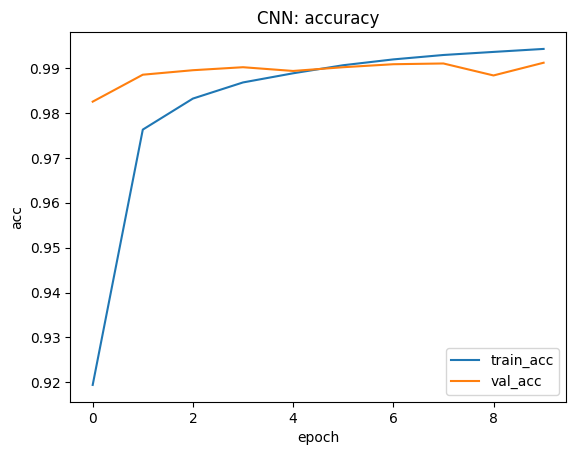

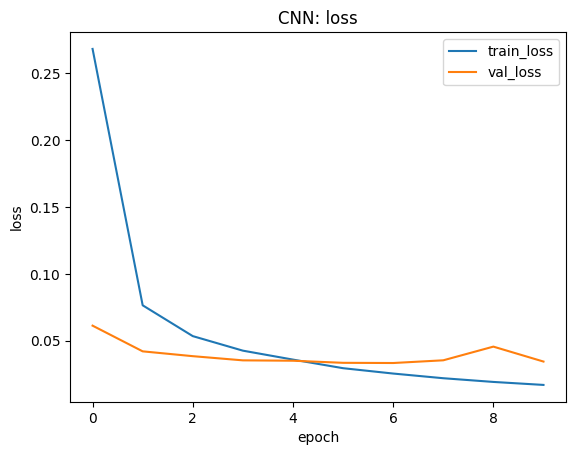

In [10]:
# 5c. Training curves (CNN)
plt.figure()
plt.plot(history_cnn.history["accuracy"], label="train_acc")
plt.plot(history_cnn.history["val_accuracy"], label="val_acc")
plt.title("CNN: accuracy")
plt.xlabel("epoch"); plt.ylabel("acc"); plt.legend(); plt.show()

plt.figure()
plt.plot(history_cnn.history["loss"], label="train_loss")
plt.plot(history_cnn.history["val_loss"], label="val_loss")
plt.title("CNN: loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend(); plt.show()


In [11]:
# Compare performance (Dense vs. CNN)

print(f"Dense Test Acc: {dense_test_acc:.4f}")
print(f"  CNN Test Acc: {cnn_test_acc:.4f}")

# Usually, CNN > Dense on images, because:
# - Convolutions capture locality (shapes, edges)
# - Weight sharing = fewer relevant parameters
# - MaxPool reduces dimensionality while keeping useful patterns


Dense Test Acc: 0.9821
  CNN Test Acc: 0.9905


              precision    recall  f1-score   support

           0     0.9919    0.9949    0.9934       980
           1     0.9921    0.9956    0.9938      1135
           2     0.9951    0.9903    0.9927      1032
           3     0.9921    0.9891    0.9906      1010
           4     0.9919    0.9949    0.9934       982
           5     0.9833    0.9910    0.9872       892
           6     0.9958    0.9875    0.9916       958
           7     0.9902    0.9864    0.9883      1028
           8     0.9788    0.9949    0.9868       974
           9     0.9930    0.9802    0.9865      1009

    accuracy                         0.9905     10000
   macro avg     0.9904    0.9905    0.9904     10000
weighted avg     0.9905    0.9905    0.9905     10000



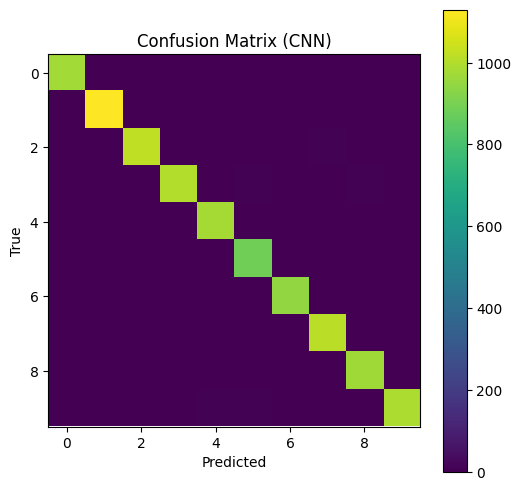

In [12]:
# Confusion matrix & incorrect examples

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Predictions for CNN (better overall)
y_proba = cnn_model.predict(x_test_cnn, verbose=0)
y_pred = y_proba.argmax(axis=1)

print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (CNN)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


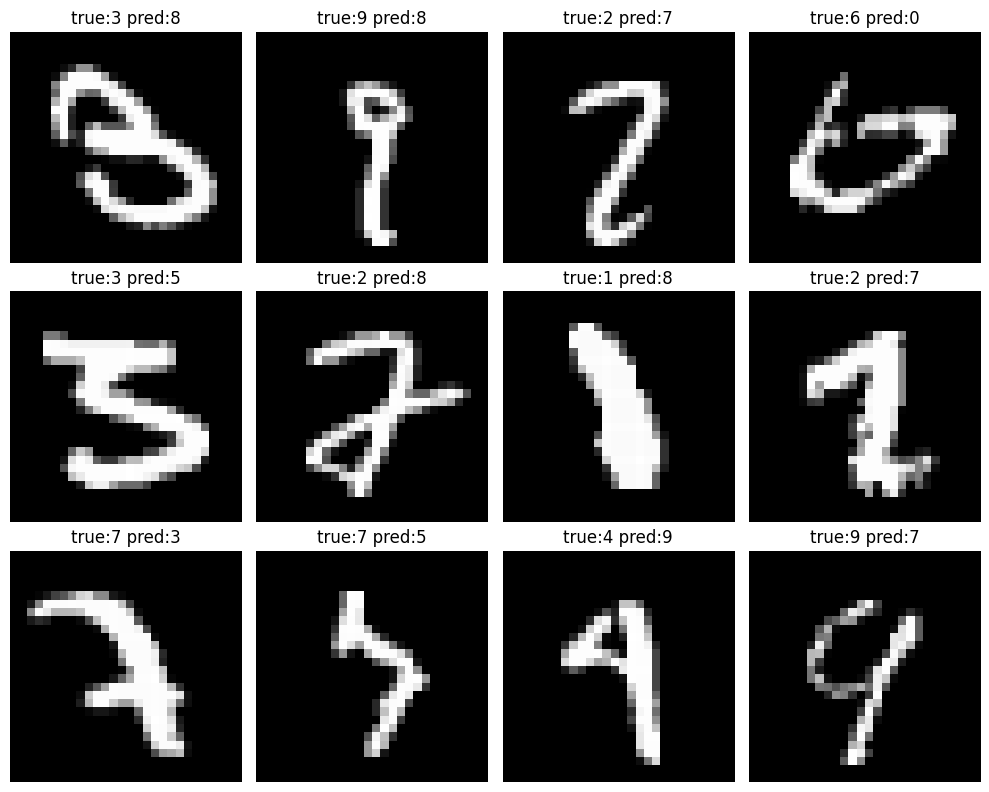

In [13]:
# Watch a few mistakes to understand where the model is confused

idx_wrong = np.where(y_pred != y_test)[0][:12]

plt.figure(figsize=(10,8))
for i, idx in enumerate(idx_wrong, 1):
    plt.subplot(3,4,i)
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"true:{y_test[idx]} pred:{y_pred[idx]}")
    plt.axis("off")
plt.tight_layout(); plt.show()


# Conclusion – Classifying Handwritten Digits with CNNs

In this challenge, we compared two neural network architectures on the MNIST dataset, which contains grayscale images of handwritten digits (0–9).

We first built a Fully Connected Neural Network (Dense model), which treats each pixel independently. While it achieved good accuracy (around 97–98%), it completely ignores the spatial structure of the image — essentially flattening it into a single long vector and losing all positional relationships between pixels.

Next, we built a Convolutional Neural Network (CNN) using convolutional and pooling layers. This model can automatically learn local visual patterns such as edges, curves, and shapes, preserving the spatial context of the image. As a result, the CNN achieved higher accuracy (around 99%) and generalized better on unseen data.

The training curves showed faster convergence and more stable validation performance for the CNN. The confusion matrix confirmed that most digits were correctly classified, with only a few confusions between visually similar digits (for example, 4 vs 9 or 3 vs 5).

# Final takeaway:
Convolutional Neural Networks significantly outperform Fully Connected Networks on image classification tasks because they can extract spatial features and build hierarchical visual representations. Dense models are a good baseline, but CNNs are more robust and accurate for visual data.